In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import fig_size

%matplotlib widget

width = 469.75502
graph_path = '../assets/'
data_path = '../data/'

mpl.rcParams.update({
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "pgf.preamble": "\n".join([  # plots will use this preamble
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage{siunitx}",
    ])
})


In [10]:
df = pd.read_csv(data_path + 'V_t.csv', sep=r'\s*,\s*', engine='python')
df

,DV,DV/sc,Dt,Dt/sc
0,7.00,1,0.0,2.5
1,6.52,1,0.9,2.5
2,6.00,1,2.0,2.5
3,5.52,1,3.1,2.5
4,5.00,1,4.5,2.5
5,4.52,1,5.9,2.5
6,4.00,1,7.5,2.5
7,3.52,1,9.2,2.5
8,3.00,1,11.4,5.0
9,2.52,1,13.8,5.0


### Errori su V

In [11]:
df['dDV'] = df['DV/sc'] / 10
df

,DV,DV/sc,Dt,Dt/sc,dDV
0,7.00,1,0.0,2.5,0.1
1,6.52,1,0.9,2.5,0.1
2,6.00,1,2.0,2.5,0.1
3,5.52,1,3.1,2.5,0.1
4,5.00,1,4.5,2.5,0.1
5,4.52,1,5.9,2.5,0.1
6,4.00,1,7.5,2.5,0.1
7,3.52,1,9.2,2.5,0.1
8,3.00,1,11.4,5.0,0.1
9,2.52,1,13.8,5.0,0.1


### Errori su t

In [12]:
df['dDt'] = df['Dt/sc'] / 10
df

,DV,DV/sc,Dt,Dt/sc,dDV,dDt
0,7.00,1,0.0,2.5,0.1,0.25
1,6.52,1,0.9,2.5,0.1,0.25
2,6.00,1,2.0,2.5,0.1,0.25
3,5.52,1,3.1,2.5,0.1,0.25
4,5.00,1,4.5,2.5,0.1,0.25
5,4.52,1,5.9,2.5,0.1,0.25
6,4.00,1,7.5,2.5,0.1,0.25
7,3.52,1,9.2,2.5,0.1,0.25
8,3.00,1,11.4,5.0,0.1,0.50
9,2.52,1,13.8,5.0,0.1,0.50


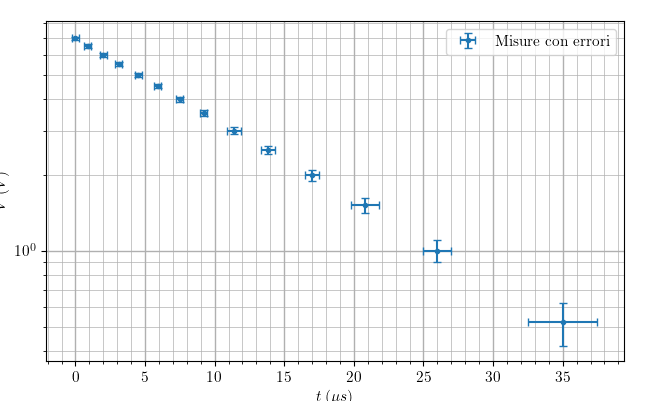

In [13]:
fig, ax = plt.subplots(figsize = fig_size.from_pt(width))
fig.tight_layout()


ax.errorbar(
    x = df['Dt'], xerr=df['dDt'],
    y = df['DV'], yerr=df['dDV'],
    fmt='o', markersize = 3,
    capsize = 3, label='Misure con errori'
)

ax.set_yscale('log')

ax.minorticks_on()
ax.grid(True, which='major', lw = 1)
ax.grid(True, which='minor', lw = 0.5)

ax.legend()

ax.set_xlabel(r'$t \; (\mu s)$')
ax.set_ylabel(r'$V \; (V)$')

fig.savefig(graph_path + 'onda_quadra_V(t).pdf', format='pdf', bbox_inches='tight')

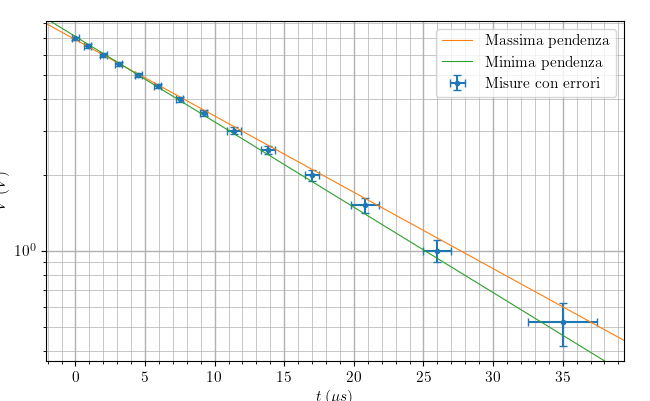

In [14]:
fig, ax = plt.subplots(figsize = fig_size.from_pt(width))
fig.tight_layout()

ax.set_yscale('log')

ax.errorbar(
    x = df['Dt'], xerr=df['dDt'],
    y = df['DV'], yerr=df['dDV'],
    fmt='o', markersize = 3,
    capsize = 3, label='Misure con errori'
)

xlim = np.array(ax.get_xlim())
ylim = np.array(ax.get_ylim())

x_max = [0, 35]
y_max = [6.9, 0.6]
# ax.plot(x_max, y_max)

l_max = lambda x: 10**(- np.log10(6.9/0.6)/35 *x) * 6.9
ax.plot(xlim, l_max(xlim), lw=0.8, label='Massima pendenza')

x_min = [0, 34]
y_min = [7.1, 0.5]
# ax.plot(x_min, y_min)

l_min = lambda x: 10**(- np.log10(7.1/0.5)/34 *x) * 7.1
ax.plot(xlim, l_min(xlim), lw=0.8, label='Minima pendenza')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.minorticks_on()
ax.grid(True, which='major', lw = 1)
ax.grid(True, which='minor', lw = 0.5)

ax.legend()

ax.set_xlabel(r'$t \; (\mu s)$')
ax.set_ylabel(r'$V \; (V)$')

fig.savefig(graph_path + 'onda_quadra_V(t)_pendenze.pdf', format='pdf', bbox_inches='tight')